## importing libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn import metrics
import warnings

## importing data set

In [92]:
df1 = pd.read_csv('top5-players.csv')
print(df1.shape)
df1.head()

(2852, 37)


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09


In [93]:
df1.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')

In [94]:
df1.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
count,2852.000000,2848.000000,2848.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,...,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1426.500000,25.060744,1997.600070,18.969846,13.514727,1213.301543,13.482328,1.720196,1.221950,2.942146,...,0.121778,0.093296,0.214916,0.114141,0.207293,0.132333,0.099007,0.231438,0.124167,0.223332
std,823.445809,4.590521,4.596294,11.517930,11.251227,961.584066,10.685045,3.203532,1.965371,4.615768,...,0.284138,0.366238,0.472989,0.277802,0.467984,0.207826,0.236825,0.334707,0.198482,0.327711
min,1.000000,15.000000,1982.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,713.750000,22.000000,1994.000000,8.000000,2.000000,296.750000,3.300000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.010000,0.050000,0.020000,0.050000
50%,1426.500000,25.000000,1998.000000,20.000000,12.000000,1113.000000,12.400000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.090000,0.000000,0.090000,0.060000,0.060000,0.140000,0.060000,0.140000
75%,2139.250000,28.000000,2001.000000,29.000000,23.000000,1987.000000,22.100000,2.000000,2.000000,4.000000,...,0.150000,0.120000,0.290000,0.140000,0.280000,0.180000,0.130000,0.330000,0.170000,0.310000
max,2852.000000,40.000000,2008.000000,38.000000,38.000000,3420.000000,38.000000,36.000000,14.000000,44.000000,...,6.000000,11.250000,11.250000,6.000000,11.250000,4.550000,6.850000,6.850000,4.550000,6.850000


## data preperation

In [95]:
df = df1[df1['Min'] >90]
print(df.shape)
#split player nationality  
split_nation = df['Nation'].str.split(' ', expand=True)


# Assign the split columns to new columns in the DataFrame
df['nation'] = split_nation[0]
df['Nation'] = split_nation[1]
df=df.drop(columns=['nation'])
split_com=df['Comp'].str.split(' ',n=1,expand=True)
df['Comp']=split_com[1]
split_pos= df['Pos'].str.split(',',expand=True)
df['Pos']=split_pos[0]
df.head()


(2426, 37)


C:\Users\mahmo\AppData\Local\Temp\ipykernel_17868\3862250162.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nation'] = split_nation[0]
C:\Users\mahmo\AppData\Local\Temp\ipykernel_17868\3862250162.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nation'] = split_nation[1]


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,ENG,DF,Bournemouth,Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,USA,MF,Union Berlin,Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,USA,MF,Eint Frankfurt,Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
4,5,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09
5,6,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,23.0,2000.0,27,17,...,0.00,0.00,0.00,0.00,0.00,0.05,0.03,0.08,0.05,0.08


In [96]:
df.isnull().sum()

Rk             0
Player         0
Nation         1
Pos            0
Squad          0
Comp           0
Age            1
Born           1
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             0
npxG           0
xAG            0
npxG+xAG       0
PrgC           0
PrgP           0
PrgR           0
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          0
xAG_90         0
xG+xAG_90      0
npxG_90        0
npxG+xAG_90    0
dtype: int64

In [97]:
df.isnull().sum()
df=df.dropna(how='any')
df.isnull().sum()


Rk             0
Player         0
Nation         0
Pos            0
Squad          0
Comp           0
Age            0
Born           0
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             0
npxG           0
xAG            0
npxG+xAG       0
PrgC           0
PrgP           0
PrgR           0
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          0
xAG_90         0
xG+xAG_90      0
npxG_90        0
npxG+xAG_90    0
dtype: int64

In [98]:
df.to_csv('cleaned_data.csv', index=False)

<Axes: >

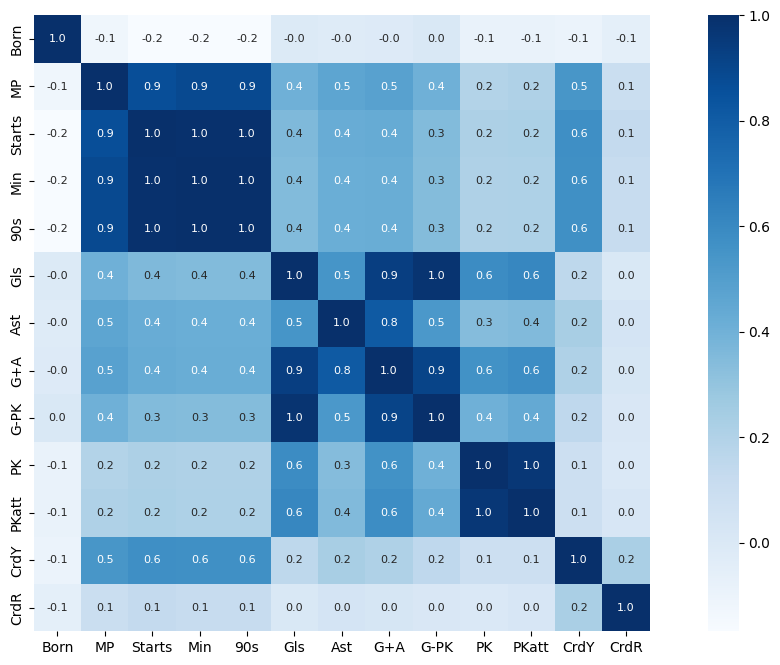

In [99]:
columns_to_include = df.columns[7:20]
data_subset = df[columns_to_include]
# Compute the correlation matrix
correlation_matrix = data_subset.corr()

plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [100]:

# Create a LabelEncoder object
label_encoder_nation = LabelEncoder()
label_encoder_pos = LabelEncoder()
label_encoder_squad = LabelEncoder()

# Apply Label Encoding to the specified columns

df['Nation_num'] = label_encoder_nation.fit_transform(df['Nation'])
df['Pos_num'] = label_encoder_pos.fit_transform(df['Pos'])
df['Squad_num'] = label_encoder_squad.fit_transform(df['Squad'])
df['Player name'] = label_encoder_nation.fit_transform(df['Player'])
df['Comp_num'] = label_encoder_nation.fit_transform(df['Comp'])

df.head(10)


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Nation_num,Pos_num,Squad_num,Player name,Comp_num
0,1,Max Aarons,ENG,DF,Bournemouth,Premier League,23.0,2000.0,20,13,...,0.00,0.06,0.06,0.00,0.06,30,0,13,1523,3
1,2,Brenden Aaronson,USA,MF,Union Berlin,Bundesliga,22.0,2000.0,30,14,...,0.14,0.13,0.27,0.14,0.27,98,3,89,330,0
2,3,Paxten Aaronson,USA,MF,Eint Frankfurt,Bundesliga,19.0,2003.0,7,1,...,0.11,0.07,0.19,0.11,0.19,98,3,26,1795,0
4,5,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35.0,1987.0,31,31,...,0.11,0.01,0.12,0.09,0.09,62,0,76,2289,2
5,6,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,23.0,2000.0,27,17,...,0.05,0.03,0.08,0.05,0.08,39,3,48,1965,2
6,7,Nabil Aberdin,FRA,DF,Getafe,La Liga,20.0,2002.0,2,2,...,0.00,0.00,0.00,0.00,0.00,34,0,34,1635,1
7,8,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30.0,1993.0,33,32,...,0.04,0.07,0.10,0.04,0.10,34,3,52,1250,2
8,9,Matthis Abline,FRA,FW,Nantes,Ligue 1,20.0,2003.0,22,12,...,0.33,0.17,0.50,0.33,0.50,34,1,65,1508,2
9,10,Abner,BRA,DF,Betis,La Liga,23.0,2000.0,23,15,...,0.01,0.06,0.07,0.01,0.07,12,0,10,21,1
10,11,Zakaria Aboukhlal,MAR,MF,Toulouse,Ligue 1,23.0,2000.0,13,9,...,0.33,0.02,0.36,0.24,0.26,62,3,87,2296,2


<Axes: >

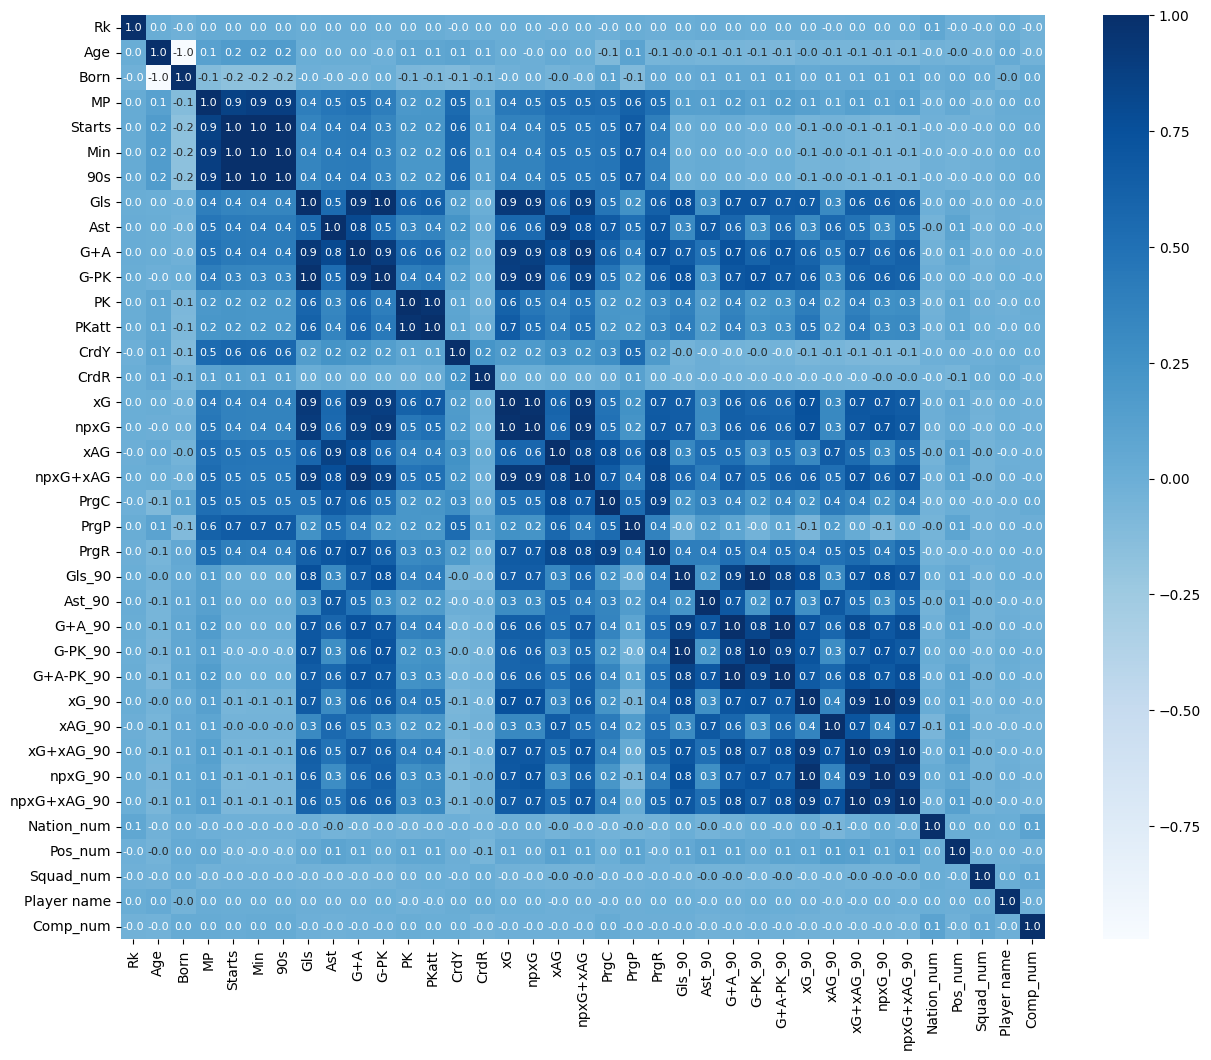

In [101]:

data_subset = df.drop(columns=['Player', 'Nation', 'Pos', 'Squad','Comp'])

correlation_matrix = data_subset.corr()

plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [102]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90', 'Nation_num', 'Pos_num',
       'Squad_num', 'Player name', 'Comp_num'],
      dtype='object')

In [103]:


X_classification = df[['Gls','Ast','PK','CrdY','CrdR','xG','PrgC','PrgP','PrgR',]]
y_classification = df['Pos']

# Define features and target for regression
X_regression = df.drop(columns=['Player', 'Nation','Comp', 'Pos', 'Squad','Gls','G+A','G-PK','xG','npxG+xAG','G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90','Gls_90','xG+xAG_90', 'npxG_90', 'npxG+xAG_90'])
y_regression = df['Gls']

# Data partitioning
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


## Random Forest model

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Standardizing the classification data
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

# Random Forest Classifier
model_classification_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_classification_rf.fit(X_train_class_scaled, y_train_class)

# Predict using the model
y_pred_class_rf = model_classification_rf.predict(X_test_class_scaled)

# Evaluate the model
accuracy_class_rf = accuracy_score(y_test_class, y_pred_class_rf)
print(f'Random Forest Classification Accuracy: {accuracy_class_rf}')




Random Forest Classification Accuracy: 0.756701030927835


In [105]:
# Create results DataFrame for classification
results_class_rf = pd.DataFrame({'Actual_Pos': y_test_class, 'Predicted': y_pred_class_rf})
results_class_rf['Player_Name'] = df['Player']
print(results_class_rf.head(10))


     Actual_Pos Predicted               Player_Name
1765         DF        DF             Ignasi Miquel
457          DF        DF            Isaac Carcelen
1675         DF        DF         Christian Mawissa
486          DF        MF  Jean-Charles Castelletto
576          MF        FW             Maxwel Cornet
106          MF        DF           Elliot Anderson
1090         DF        DF          Massadio Haïdara
1166         DF        MF              Dean Huijsen
1606         DF        MF          Faitout Maouassa
194          DF        DF           Alejandro Balde


In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Standardizing the regression data
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Random Forest Regressor
model_regression_rf = RandomForestRegressor(random_state=42)
model_regression_rf.fit(X_train_reg_scaled, y_train_reg)

# Predict using the model
y_pred_reg_rf = model_regression_rf.predict(X_test_reg_scaled)

# Ensure predictions are non-negative
y_pred_reg_rf = np.maximum(y_pred_reg_rf, 0)
# Convert predictions to int
y_pred_reg_rf = y_pred_reg_rf.astype(int)

# Evaluate the model
mse_reg_rf = mean_squared_error(y_test_reg, y_pred_reg_rf)
print(f'Random Forest Regression Mean Squared Error: {mse_reg_rf}')

r2_rf = r2_score(y_test_reg, y_pred_reg_rf)
print(f'Random Forest Regression R-squared (R²): {r2_rf}')




Random Forest Regression Mean Squared Error: 1.688659793814433
Random Forest Regression R-squared (R²): 0.8328086000143109


In [107]:
# Create results DataFrame for regression
results_reg_rf = pd.DataFrame({'Actual_goals': y_test_reg, 'Predicted': y_pred_reg_rf})
results_reg_rf['Player_Name'] = df['Player']
print(results_reg_rf.head(10))

      Actual_goals  Predicted               Player_Name
1765             1          1             Ignasi Miquel
457              0          0            Isaac Carcelen
1675             2          1         Christian Mawissa
486              2          0  Jean-Charles Castelletto
576              1          0             Maxwel Cornet
106              0          1           Elliot Anderson
1090             0          0          Massadio Haïdara
1166             2          0              Dean Huijsen
1606             0          0          Faitout Maouassa
194              0          0           Alejandro Balde


## Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Standardizing the classification data
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

# Decision Tree Classifier
model_classification_dt = DecisionTreeClassifier(random_state=42)
model_classification_dt.fit(X_train_class_scaled, y_train_class)

# Predict using the model
y_pred_class_dt = model_classification_dt.predict(X_test_class_scaled)

# Evaluate the model
accuracy_class_dt = accuracy_score(y_test_class, y_pred_class_dt)
print(f'Decision Tree Classification Accuracy: {accuracy_class_dt}')




Decision Tree Classification Accuracy: 0.6989690721649484


In [109]:
# Create results DataFrame for classification
results_class_dt = pd.DataFrame({'Actual_Pos': y_test_class, 'Predicted': y_pred_class_dt})
results_class_dt['Player_Name'] = df['Player']
print(results_class_dt.head(10))

     Actual_Pos Predicted               Player_Name
1765         DF        DF             Ignasi Miquel
457          DF        MF            Isaac Carcelen
1675         DF        MF         Christian Mawissa
486          DF        DF  Jean-Charles Castelletto
576          MF        FW             Maxwel Cornet
106          MF        FW           Elliot Anderson
1090         DF        DF          Massadio Haïdara
1166         DF        FW              Dean Huijsen
1606         DF        MF          Faitout Maouassa
194          DF        DF           Alejandro Balde


In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Standardizing the regression data
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Decision Tree Regressor for regression
model_regression_dt = DecisionTreeRegressor(random_state=42)
model_regression_dt.fit(X_train_reg_scaled, y_train_reg)

# Predict using the model
y_pred_reg_dt = model_regression_dt.predict(X_test_reg_scaled)

# Ensure predictions are non-negative
y_pred_reg_dt = np.maximum(y_pred_reg_dt, 0)

# Convert predictions to int
y_pred_reg_dt = y_pred_reg_dt.astype(int)

# Evaluate the model
mse_reg_dt = mean_squared_error(y_test_reg, y_pred_reg_dt)
print(f'Decision Tree Regression Mean Squared Error: {mse_reg_dt}')
r2_dt = r2_score(y_test_reg, y_pred_reg_dt)
print(f'Decision Tree Regression R-squared (R²): {r2_dt}')




Decision Tree Regression Mean Squared Error: 3.063917525773196
Decision Tree Regression R-squared (R²): 0.6966466173641831


In [111]:
# Create results DataFrame for regression
results_reg_dt = pd.DataFrame({'Actual_goals': y_test_reg, 'DecisionTree_Pred': y_pred_reg_dt})
results_reg_dt['Player_Name'] = df['Player']
print(results_reg_dt.head(10))

      Actual_goals  DecisionTree_Pred               Player_Name
1765             1                  0             Ignasi Miquel
457              0                  1            Isaac Carcelen
1675             2                  1         Christian Mawissa
486              2                  0  Jean-Charles Castelletto
576              1                  1             Maxwel Cornet
106              0                  1           Elliot Anderson
1090             0                  0          Massadio Haïdara
1166             2                  0              Dean Huijsen
1606             0                  0          Faitout Maouassa
194              0                  0           Alejandro Balde


## SVR model

In [112]:
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardizing the classification data
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

# Building the SVM model for classification
model_classification = SVC(kernel='rbf', random_state=42)
model_classification.fit(X_train_class_scaled, y_train_class)

# Predict using the model
y_pred_class = model_classification.predict(X_test_class_scaled)

# Evaluate the model
accuracy_class_SVC = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy_class_SVC}')




Classification Accuracy: 0.7237113402061855


In [113]:
# Create results DataFrame for classification
results_class = pd.DataFrame({'Actual_Pos': y_test_class, 'Predicted': y_pred_class})
results_class['Player_Name'] = df['Player']
print(results_class.head(10))

     Actual_Pos Predicted               Player_Name
1765         DF        DF             Ignasi Miquel
457          DF        DF            Isaac Carcelen
1675         DF        DF         Christian Mawissa
486          DF        DF  Jean-Charles Castelletto
576          MF        FW             Maxwel Cornet
106          MF        DF           Elliot Anderson
1090         DF        DF          Massadio Haïdara
1166         DF        DF              Dean Huijsen
1606         DF        DF          Faitout Maouassa
194          DF        FW           Alejandro Balde


In [114]:
# Standardizing the regression data
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Building the SVM model for regression
model_regression = SVR(kernel='rbf')
model_regression.fit(X_train_reg_scaled, y_train_reg)

# Predict using the model
y_pred_reg = model_regression.predict(X_test_reg_scaled)

# Ensure predictions are non-negative
y_pred_reg = np.maximum(y_pred_reg, 0)

# Convert predictions to int
y_pred_reg = y_pred_reg.astype(int)

# Evaluate the model
mse_reg_SVR = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Regression Mean Squared Error: {mse_reg_SVR}')

r2_SVR = r2_score(y_test_reg, y_pred_reg)
print(f'R-squared (R²): {r2_SVR}')

Regression Mean Squared Error: 3.181443298969072
R-squared (R²): 0.6850105858633476


In [115]:
# Create results DataFrame for regression
results_reg = pd.DataFrame({'Actual_goals': y_test_reg, 'Predicted': y_pred_reg})
results_reg['Player_Name'] = df['Player']
print(results_reg.head(10))


      Actual_goals  Predicted               Player_Name
1765             1          0             Ignasi Miquel
457              0          0            Isaac Carcelen
1675             2          0         Christian Mawissa
486              2          0  Jean-Charles Castelletto
576              1          0             Maxwel Cornet
106              0          1           Elliot Anderson
1090             0          0          Massadio Haïdara
1166             2          0              Dean Huijsen
1606             0          0          Faitout Maouassa
194              0          0           Alejandro Balde


# Linear Regression

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Standardizing the classification data
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

# Logistic Regression for classification
model_classification_lr = LogisticRegression(random_state=42)
model_classification_lr.fit(X_train_class_scaled, y_train_class)

# Predict using the model
y_pred_class_lr = model_classification_lr.predict(X_test_class_scaled)

# Evaluate the model
accuracy_class_lr = accuracy_score(y_test_class, y_pred_class_lr)
print(f'Logistic Regression Classification Accuracy: {accuracy_class_lr}')



Logistic Regression Classification Accuracy: 0.6948453608247422


In [117]:
# Create results DataFrame for classification
results_class_lr = pd.DataFrame({'Actual_Pos': y_test_class, 'Predicted': y_pred_class_lr})
results_class_lr['Player_Name'] = df['Player']
print(results_class_lr.head(10))



     Actual_Pos Predicted               Player_Name
1765         DF        MF             Ignasi Miquel
457          DF        DF            Isaac Carcelen
1675         DF        DF         Christian Mawissa
486          DF        DF  Jean-Charles Castelletto
576          MF        FW             Maxwel Cornet
106          MF        DF           Elliot Anderson
1090         DF        DF          Massadio Haïdara
1166         DF        DF              Dean Huijsen
1606         DF        DF          Faitout Maouassa
194          DF        DF           Alejandro Balde


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Standardizing the regression data
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Linear Regression
model_regression_lr = LinearRegression()
model_regression_lr.fit(X_train_reg_scaled, y_train_reg)

# Predict using the model
y_pred_reg_lr = model_regression_lr.predict(X_test_reg_scaled)

# Ensure predictions are non-negative
y_pred_reg_lr = np.maximum(y_pred_reg_lr, 0)
# Convert predictions to int
y_pred_reg_lr = y_pred_reg_lr.astype(int)

# Evaluate the model
mse_reg_lr = mean_squared_error(y_test_reg, y_pred_reg_lr)
print(f'Linear Regression Mean Squared Error: {mse_reg_lr}')

r2_lr = r2_score(y_test_reg, y_pred_reg_lr)
print(f'Linear Regression R-squared (R²): {r2_lr}')




Linear Regression Mean Squared Error: 1.5690721649484536
Linear Regression R-squared (R²): 0.8446487724186698


In [119]:
# Create results DataFrame for regression
results_reg_lr = pd.DataFrame({'Actual_goals': y_test_reg, 'Predicted': y_pred_reg_lr})
results_reg_lr['Player_Name'] = df['Player']
print(results_reg_lr.head(10))

      Actual_goals  Predicted               Player_Name
1765             1          1             Ignasi Miquel
457              0          0            Isaac Carcelen
1675             2          0         Christian Mawissa
486              2          0  Jean-Charles Castelletto
576              1          0             Maxwel Cornet
106              0          1           Elliot Anderson
1090             0          0          Massadio Haïdara
1166             2          0              Dean Huijsen
1606             0          0          Faitout Maouassa
194              0          0           Alejandro Balde


# neural network

In [120]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

X_classification = df[['Gls','Ast','PK','CrdY','CrdR','xG','PrgC','PrgP','PrgR',]]
y_classification = df['Pos_num']

# Define features and target for regression
X_regression = df.drop(columns=['Player', 'Nation','Comp', 'Pos', 'Squad','Gls','G+A','G-PK','xG','npxG+xAG','G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90','Gls_90','xG+xAG_90', 'npxG_90', 'npxG+xAG_90'])
y_regression = df['Gls']

# Data partitioning
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


# Standardizing the data
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# Define the neural network model for multi-class classification
model_classification = Sequential()
model_classification.add(Dense(256, activation='relu', input_dim=X_train_class_scaled.shape[1]))
model_classification.add(BatchNormalization())
model_classification.add(Dropout(0.4))
model_classification.add(Dense(128, activation='relu'))
model_classification.add(BatchNormalization())
model_classification.add(Dropout(0.4))
model_classification.add(Dense(64, activation='relu'))
model_classification.add(BatchNormalization())
model_classification.add(Dropout(0.4))
model_classification.add(Dense(len(np.unique(y_train_class)), activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_classification.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_classification.fit(X_train_class_scaled, y_train_class, epochs=100, batch_size=32, verbose=1)

# Predict using the model
y_pred_class_probs = model_classification.predict(X_test_class_scaled)
y_pred_class = np.argmax(y_pred_class_probs, axis=1)

# Evaluate the model
accuracy_class_NN = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy_class_NN}')




Epoch 1/100


i:\ML\Players-statics-analysis--main\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4495 - loss: 1.4680
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5180 - loss: 1.2167
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5582 - loss: 1.0527
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5572 - loss: 1.0139
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5856 - loss: 0.9465
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5969 - loss: 0.9191
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6015 - loss: 0.9036
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6258 - loss: 0.8544
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6077 - loss: 0.8638
Epoch 10/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6103 - loss: 0.8325
Epoch 11/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6412 - loss: 0.8228
Epoch 12/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6479 - lo

In [121]:
# Create results DataFrame
results = pd.DataFrame({'Actual_Pos': y_test_class, 'Predicted': y_pred_class})
results['Player_Name'] = df['Player']
print(results.head(10))


      Actual_Pos  Predicted               Player_Name
1765           0          0             Ignasi Miquel
457            0          0            Isaac Carcelen
1675           0          0         Christian Mawissa
486            0          3  Jean-Charles Castelletto
576            3          1             Maxwel Cornet
106            3          3           Elliot Anderson
1090           0          0          Massadio Haïdara
1166           0          3              Dean Huijsen
1606           0          1          Faitout Maouassa
194            0          0           Alejandro Balde


In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Standardizing the data
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Define the improved neural network model for regression
model_regression = Sequential()
model_regression.add(Dense(256, activation='relu', input_dim=X_train_reg_scaled.shape[1]))
model_regression.add(BatchNormalization())
model_regression.add(Dropout(0.4))
model_regression.add(Dense(128, activation='relu'))
model_regression.add(BatchNormalization())
model_regression.add(Dropout(0.4))
model_regression.add(Dense(64, activation='relu'))
model_regression.add(BatchNormalization())
model_regression.add(Dropout(0.4))
model_regression.add(Dense(1, activation='linear'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_regression.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation split
model_regression.fit(X_train_reg_scaled, y_train_reg, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Predict using the model
y_pred_reg = model_regression.predict(X_test_reg_scaled)

# Ensure predictions are non-negative
y_pred_reg = np.maximum(y_pred_reg, 0)

# Convert predictions to int
y_pred_reg = y_pred_reg.astype(int)

# Evaluate the model
mse_reg_NN = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Regression Mean Squared Error: {mse_reg_NN}')

r2_NN = r2_score(y_test_reg, y_pred_reg)
print(f'R-squared (R²): {r2_NN}')




Epoch 1/100


i:\ML\Players-statics-analysis--main\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.5131 - val_loss: 11.1678
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5127 - val_loss: 7.3714
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9808 - val_loss: 4.9544
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5239 - val_loss: 3.9683
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1584 - val_loss: 2.3779
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8519 - val_loss: 2.5771
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3524 - val_loss: 1.9344
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5909 - val_loss: 2.1969
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9061 - val_loss: 2.1866
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3094 - val_loss: 2.2373
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3538 - val_loss: 2.1256
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7944 - val_

In [123]:
# Create results DataFrame
results = pd.DataFrame({'Actual_goals': y_test_reg, 'Predicted': y_pred_reg.ravel()})
results['Player_Name'] = df['Player']
print(results.head(10))

      Actual_goals  Predicted               Player_Name
1765             1          1             Ignasi Miquel
457              0          0            Isaac Carcelen
1675             2          0         Christian Mawissa
486              2          0  Jean-Charles Castelletto
576              1          0             Maxwel Cornet
106              0          1           Elliot Anderson
1090             0          0          Massadio Haïdara
1166             2          0              Dean Huijsen
1606             0          0          Faitout Maouassa
194              0          0           Alejandro Balde


# Comparison between models

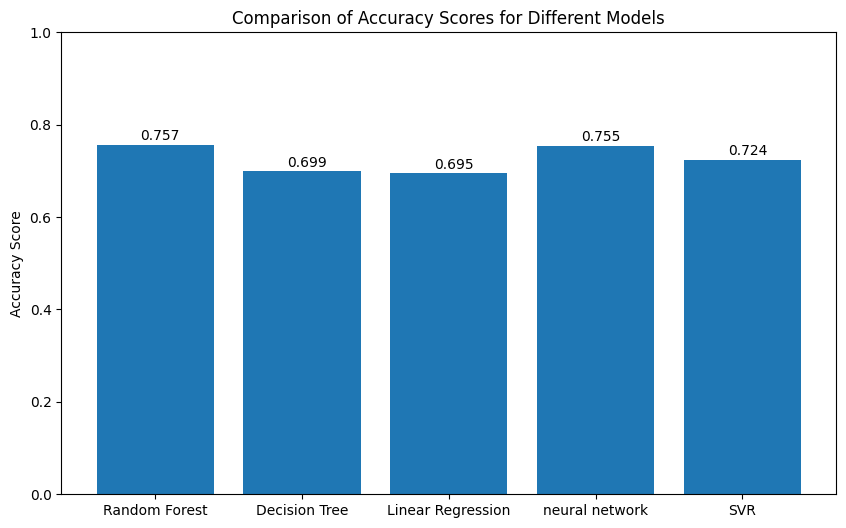

In [124]:
accuracy_scores = {
    'Random Forest': accuracy_class_rf,
    'Decision Tree': accuracy_class_dt,
    'Linear Regression': accuracy_class_lr,
    'neural network': accuracy_class_NN,
    'SVR': accuracy_class_SVC
}

# Extract models and scores
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores)

# Adding text labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.01, f'{yval:.3f}')

plt.ylim(0, 1)  # Accuracy values range from 0 to 1
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Models')
plt.show()


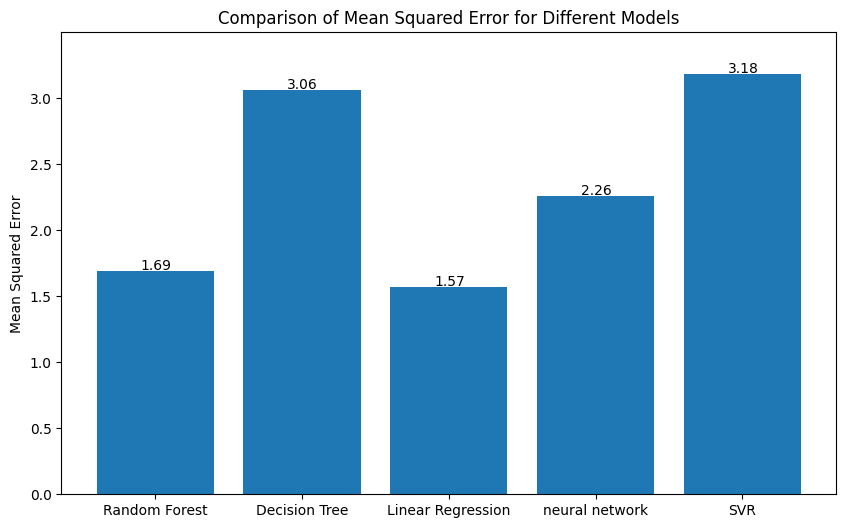

In [125]:
Mean_Squared_Error = {
    'Random Forest': mse_reg_rf,
    'Decision Tree': mse_reg_dt,
    'Linear Regression': mse_reg_lr,
    'neural network': mse_reg_NN,
    'SVR': mse_reg_SVR
}

# Extracting models and their MSE values
models = list(Mean_Squared_Error.keys())
scores = list(Mean_Squared_Error.values())

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores)

# Adding text labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, yval + 0.01, round(yval, 2))

plt.ylim(0, max(scores) * 1.1)  # Adjusted to fit the MSE values
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different Models')
plt.show()

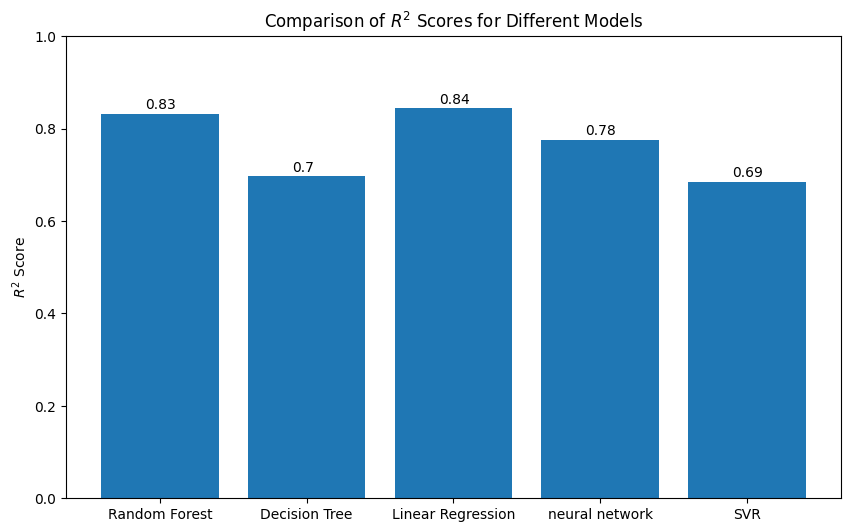

In [126]:
r2_scores = {
    'Random Forest': r2_rf,
    'Decision Tree': r2_dt,
    'Linear Regression': r2_lr,
    'neural network': r2_NN,
    'SVR': r2_SVR
}
models = list(r2_scores.keys())
scores = list(r2_scores.values())

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores)

# Adding text labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.01, round(yval, 2))

plt.ylim(0, 1)  # R^2 values range from 0 to 1
plt.ylabel('$R^2$ Score')
plt.title('Comparison of $R^2$ Scores for Different Models')
plt.show()

# Neural Network is the Best one for classifacation

# LinearRegression is the Best one for regression